In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [55]:
dataset = pd.read_csv('train.csv')
dataset = dataset.iloc[:,3:].values

In [56]:
dataset

array([[13],
       [11],
       [14],
       ...,
       [74],
       [62],
       [82]])

In [57]:
X = dataset[:1826,:]

In [59]:
X.shape

(1826, 1)

In [60]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(X)

In [61]:
training_set_scaled.shape

(1826, 1)

In [62]:
X_train_seq = []
y_train_seq = []
for i in range(60, 1826):
    X_train_seq.append(training_set_scaled[i-60:i, 0])
    y_train_seq.append(training_set_scaled[i, 0])
X_train_seq, y_train_seq = np.array(X_train_seq), np.array(y_train_seq)

In [63]:
X_train_seq.shape

(1766, 60)

In [65]:
y_train_seq.shape

(1766,)

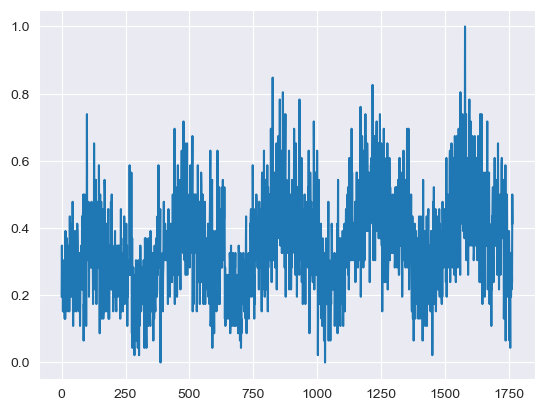

In [66]:
plt.plot(y_train_seq)
plt.show()

In [67]:
X_train_seq.shape

(1766, 60)

In [68]:
X_train_seq = np.reshape(X_train_seq, (X_train_seq.shape[0], X_train_seq.shape[1], 1))

In [69]:
X_train_seq.shape

(1766, 60, 1)

In [70]:
y_train_seq.shape

(1766,)

In [71]:
y_train_seq.shape

(1766,)

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [74]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_seq.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_seq.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_seq.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

2023-10-31 00:51:07.205436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-31 00:51:07.206265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-31 00:51:07.206796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [75]:
regressor.fit(X_train_seq, y_train_seq, epochs = 100, batch_size = 32)

Epoch 1/100


2023-10-31 00:51:09.145862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-31 00:51:09.146612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-31 00:51:09.147030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

56/56 [==============================] - 4s 38ms/step - loss: 0.0254
Epoch 2/100
56/56 [==============================] - 2s 40ms/step - loss: 0.0166
Epoch 3/100
56/56 [==============================] - 2s 41ms/step - loss: 0.0160
Epoch 4/100
56/56 [==============================] - 2s 42ms/step - loss: 0.0161
Epoch 5/100
56/56 [==============================] - 2s 41ms/step - loss: 0.0154
Epoch 6/100
56/56 [==============================] - 2s 40ms/step - loss: 0.0161
Epoch 7/100
56/56 [==============================] - 2s 41ms/step - loss: 0.0158
Epoch 8/100
56/56 [==============================] - 2s 41ms/step - loss: 0.0155
Epoch 9/100
56/56 [==============================] - 2s 42ms/step - loss: 0.0154
Epoch 10/100
56/56 [==============================] - 2s 41ms/step - loss: 0.0154
Epoch 11/100
56/56 [==============================] - 2s 41ms/step - loss: 0.0152
Epoch 12/100
56/56 [==============================] - 2s 41ms/step - loss: 0.0150
Epoch 13/100
56/56 [=================

In [77]:
y_pred = regressor.predict(X_train_seq)

2023-10-31 00:56:08.226479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-31 00:56:08.227336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-31 00:56:08.227826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 1/56 [..............................] - ETA: 31s

2023-10-31 00:56:08.476386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-31 00:56:08.476962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-31 00:56:08.477358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

56/56 [==============================] - 1s 9ms/step


In [78]:
y_pred

array([[0.26643422],
       [0.27822307],
       [0.24499945],
       ...,
       [0.311496  ],
       [0.33700413],
       [0.37140715]], dtype=float32)

In [80]:
y_train_seq

array([0.19565217, 0.34782609, 0.2173913 , ..., 0.23913043, 0.5       ,
       0.41304348])

In [79]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train_seq, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.012428927978344979


In [90]:
y_pred = sc.inverse_transform(y_pred)

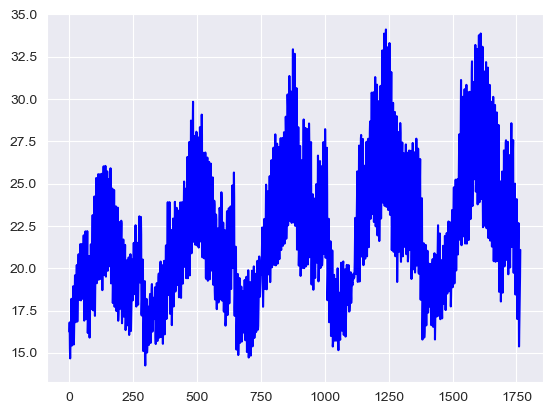

In [92]:

plt.plot(y_pred,color ='blue')
plt.show()
